# <span style= "color: #19568F;">🏦**Mortgage Backed Securities Analysis and Prediction**</span>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Project Domain : FinTech__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

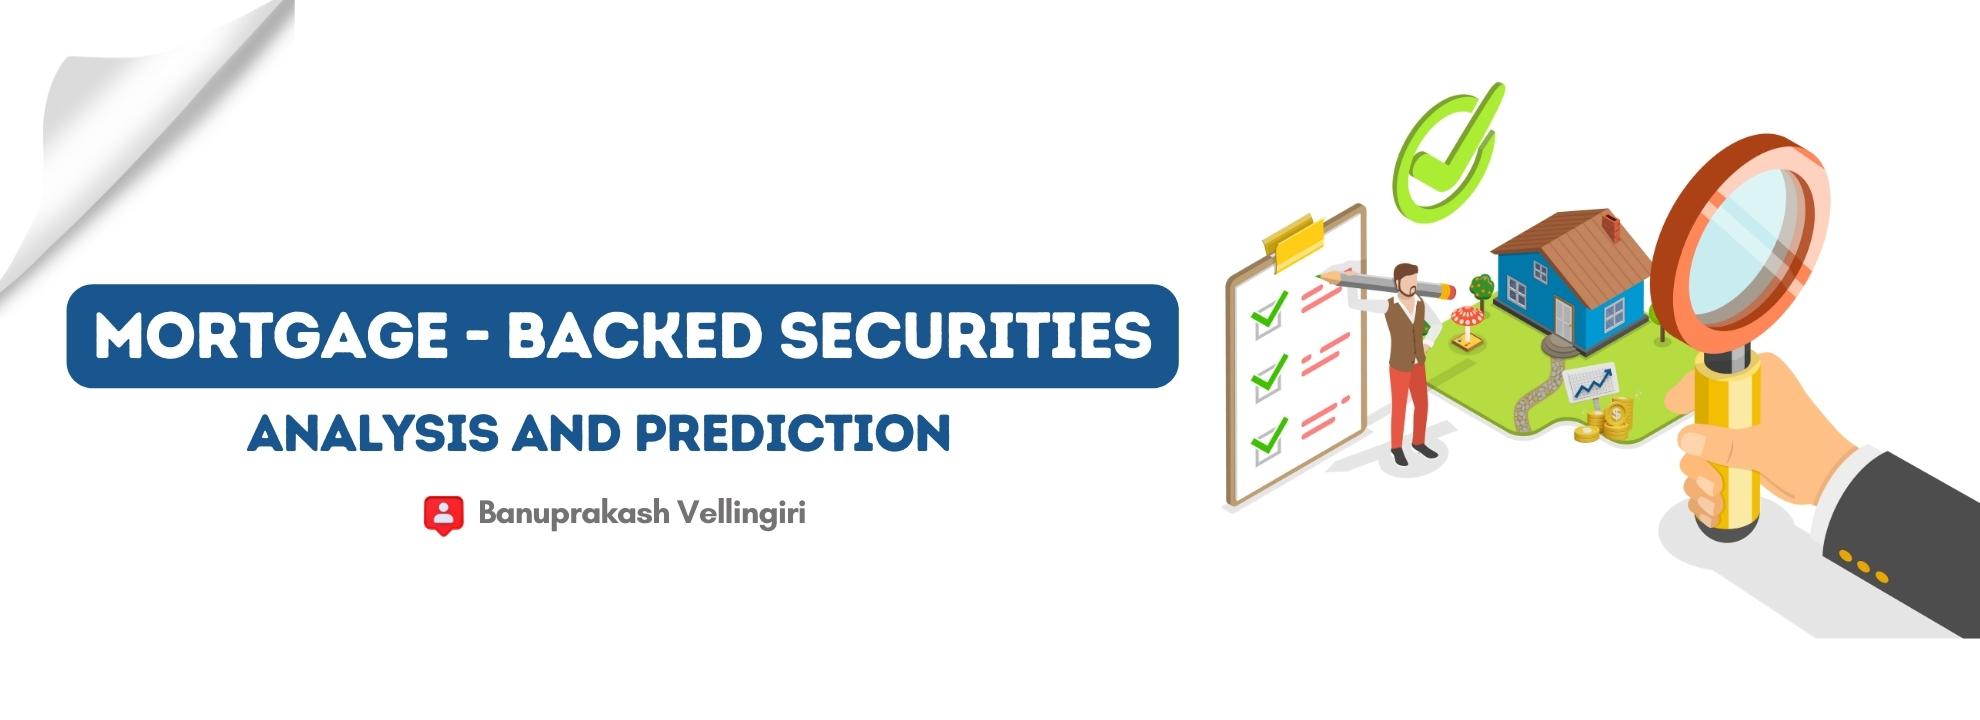

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __A. What is Mortgage Backed Securities (MBS) ?__
- A mortgage backed security (MBS) is an investment similar to a bond that i made up of a bundle of home loans bought from the banks that issued them.
- In this system, the loans issued by the bank is in turn sold to investors at a discounted rate to free up the bank funds.
- These loans are sold in the form of bonds by investment banks wherein loans are grouped together according to their type and quality.
- For the investor, an MBS is as safe as the mortgage loans that back it up.

#### __B. About Prepayment Risk:__

- Prepayment risk in mortgages involves borrowers paying off their loans earlier than expected.
- Reasons for prepayment include refinancing at lower interest rates or selling properties.
- Financial institutions like banks or mortgage lenders face this risk.
- Early repayment means lenders receive principal sooner than planned.
- Lenders may lose out on anticipated interest income if loans are prepaid.
- It's a significant consideration in mortgage lending due to its potential impact on revenue streams.

#### __C. Project Goal:__

The objective of this project is to develop a comprehensive machine learning model for mortgage backed analysis and prediction.

__`Task-1:`__

- The first task involves constructing a classification pipeline to determine the eligibility of individuals for loans.

__`Task-2:`__

- Subsequently,the second task aims to assess the prepayment risks associated with these loans by constructing a regression pipeline.

#### __D. About Data:__

The dataset used for entire processing and building a pipeline is obtained  from "[Freddie Mac](https://www.freddiemac.com/about)" web portal 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## <span style= "color: #19568F;"> __TASK-1 Developing A Classification Model To Predict Loan Delinquency__</span>
                                    
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### __0.1 Loading the Dataset :__
- The available data is in a zip format, so it needs to be unzipped to get the required file.

In [ ]:
#Importing the dependencies
import zipfile
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Unzipping 
zip_file_path=r"C:\Users\banup\Desktop\Technocolabs Softwares\Mortgage-Based-Securities-Analysis-and-Prediction\MortgageLoanExport.zip"
extract_to=r"C:\Users\banup\Desktop\Technocolabs Softwares\Mortgage-Based-Securities-Analysis-and-Prediction"
#--------------------------------------------------------------------------------------------------
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        zip_file.extractall(extract_to)

In [ ]:
#Loading the extracted ".csv" file into pandas dataframe
df=pd.read_csv('LoanExport.csv')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
#---------------------------------------------------------------------------
#Shape
print("Shape of the dataset: ",df.shape)
#---------------------------------------------------------------------------
#Displaying the dataset
df.head(5)

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- The dataset consists of  ` 291451 rows`  and  `28 columns` .

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### **0.2. Column Description:**

| Serial | Column Name          | Description                                                                                           |
|--------|----------------------|-------------------------------------------------------------------------------------------------------|
|   1    | CreditScore          | Credit score of the borrower(s) at the time of mortgage origination.                                    |
|   2    | FirstPaymentDate     | Date of the first mortgage payment made by the borrower after the loan origination.                     |
|   3    | FirstTimeHomebuyer   | Binary column indicating whether the borrower is a first-time homebuyer or not.                         |
|   4    | MaturityDate         | Date when the mortgage loan is scheduled to be fully paid off.                                          |
|   5    | MSA                  | Metropolitan Statistical Area code where the property is located.                                        |
|   6    | MIP                  | Mortgage Insurance Percent, a fee paid by the borrower to protect the lender in case of default.        |
|   7    | Units                | Number of housing units contained within the property securing the mortgage.                             |
|   8    | Occupancy            | Indicates whether the property is owner-occupied, a second home, or an investment property.             |
|   9    | OCLTV                | Original Combined Loan-to-Value ratio, total mortgage lien(s) amount divided by the appraised value.    |
|   10   | DTI                  | Debt-to-Income ratio, borrower's total monthly debt payments divided by their gross monthly income.     |
|   11   | OrigUPB              | Original Unpaid Principal Balance, initial loan amount at the time of origination.                      |
|   12   | LTV                  | Loan-to-Value ratio, ratio of the loan amount to the appraised value of the property.                   |
|   13   | OrigInterestRate     | Interest rate on the mortgage loan at the time of origination.                                           |
|   14   | Channel              | Origination channel through which the mortgage loan was obtained, such as retail, broker, or correspondent. |
|   15   | PPM                  |(penalty for early payment of principal)The indicator denoting whether the borrower is subject to a penalty for early payment of principal.                       |
|   16   | ProductType          | Type of mortgage product, such as fixed-rate mortgage (FRM) or adjustable-rate mortgage (ARM).          |
|   17   | PropertyState        | State in which the property securing the mortgage loan is located.                                       |
|   18   | PropertyType         | Type of property securing the mortgage loan, such as (CP = Cooperative,CO = Condominium,PU = Planned Unit Development,SF = Single-Family,MH = Manufactured Housing)   |
|   19   | PostalCode           | Postal code of the property securing the mortgage loan.                                                  |
|   20   | LoanSeqNum           | Unique identifier assigned to each mortgage loan originated within the dataset.                          |
|   21   | LoanPurpose          | Purpose of the mortgage loan, such as purchase, refinance, or cash-out refinance.                        |
|   22   | OrigLoanTerm         | Original term (in months) of the mortgage loan, representing the duration over which the loan is to be repaid. |
|   23   | NumBorrowers         | Number of borrowers associated with the mortgage loan.                                                   |
|   24   | SellerName           | Name of the entity that sold the mortgage loan to the originating lender.                                |
|   25   | ServicerName         | Name of the entity responsible for servicing the mortgage loan.                                          |
|   26   | EverDelinquent       | Binary column indicating whether the loan has ever been delinquent (missed payments) at any point in its history. |
|   27   | MonthsDelinquent     | Total number of months the loan has been delinquent.                                                     |
|   28   | MonthsInRepayment    | Total number of months since the loan entered the repayment phase.                                       |


### __0.3 Checking for Data Quality:__

In [ ]:
#Basic information about the dataset
df.info()

In [ ]:
#Summary statistics
df.describe()

__0.3.1 Checking for Duplicates and Null Values:__

In [ ]:
#Checking for duplicates
print("1. Duplicated Rows: ",df.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values:")
pd.DataFrame(df.isna().sum()).T

__0.3.2 Checking for Unique Value Counts in Categorical Columns:__

In [ ]:
#Categorical columns list
#Excluding the "LoanSeqNum" column because it consists of unique numbers for each loan.
categorical_columns=['FirstTimeHomebuyer','MSA','Occupancy','Channel','PPM','ProductType','PropertyState', 'PropertyType','PostalCode','LoanPurpose','SellerName', 'ServicerName','EverDelinquent',]

In [ ]:
#Number of unique values in categorical columns
print("Number of Unique Values in Categorical Columns:")
pd.DataFrame(pd.Series(df[categorical_columns].nunique().to_dict())).T

In [ ]:
#Unique value counts
print('Unique Value Counts:')
print("")
#-------------------------------------------------------------------------------------------
for i,column in enumerate(categorical_columns):
    print(f'{i+1}.{column}')
    print("Number of unique categories:",df[column].nunique())
    print(df[column].value_counts().to_dict())
    print("-"*50)

__0.3.3 Checking for errors in Discrete Numerical Columns:__

In [ ]:
discrete_numerical_columns=['NumBorrowers','MIP', 'Units', 'OrigLoanTerm', 'MonthsDelinquent', 'MonthsInRepayment']

In [ ]:
for i,column in enumerate(discrete_numerical_columns):
    print(f'{i+1}.{column}')
    print(df[column].value_counts().to_dict())
    print("-"*50)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 __Data Quality Assessment :__

- The date columns, such as 'FirstPaymentDate' and 'MaturityDate', are not in the appropriate format.
- There is no duplicated entries.
- The column 'SellerName' has "24994" missing entries.
- The 'MSA', 'FirstTimeHomebuyer', 'PPM', 'NumBorrowers' and 'PropertyType' columns contain the value "X," which represents unknown.
- Extra spaces are present in category names in columns like 'MSA', 'ProductType', and 'ServicerName'.
- No spelling errors are observed.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## __Step 1: Data Preprocessing and Data Labeling__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __1.1 Converting the Date Columns to the Appropriate Format:__

`Since the values in the two date columns appear to contain only the year and month, we will assume the day as 1 for all entries`

In [ ]:
#Diplaying the columns representing only dates.
df[["FirstPaymentDate",	"MaturityDate"]].head(3)

In [ ]:
#'FirstPaymentDate'
df['FirstPaymentDate'] =pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')
#---------------------------------------------------------------------------------
#'MaturityDate'
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')

#### __1.2 Removing Unknown Values:__

__1.2.1 Removing the Unknown Values in "FirstTimeHomebuyer" Column:__

In [ ]:
print('Total number of unknown entries (X) in "FirstTimeHomebuyer":',df[df['FirstTimeHomebuyer']=="X"].shape[0])

In [ ]:
df = df[df['FirstTimeHomebuyer'] != 'X']

#### __1.3 Removing the Unnecessary Columns:__


- The columns related to dates, such as 'FirstPaymentDate' and 'MaturityDate', have been omitted from the dataset since they are not relevant for this particular problem statement.

- The column 'LoanSeqNum' contains unique identifiers that are not utilized in our analysis.

In [ ]:
#Dropping the MSA column 
df.drop(['FirstPaymentDate','MaturityDate','LoanSeqNum'], axis=1, inplace=True)

In [ ]:
df.head(2)

In [ ]:
#Creating a new list of categorical columns by removing "MSA"
categorical_columns=['FirstTimeHomebuyer' ,'Occupancy', 'Channel','MSA', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanPurpose', 'SellerName', 'ServicerName', 'EverDelinquent']

#### __1.4 Imputing the Missing Values:__


__1.4.1 Imputing the Irrelavant Value by Relavant Value in "CreditScore" Column:__
- The "CreditScore" column contains values where zero actually represents the maximum score of 850. Therefore, we need to convert all instances of 0 to 850.

In [ ]:
df['CreditScore'] = df['CreditScore'].replace(0, 850)

In [ ]:
print('Total number of unknown entries (X) in "FirstTimeHomebuyer":',df[df['FirstTimeHomebuyer']=="X"].shape[0])

In [ ]:
print(f'Most Frequently repeating category:"{df["FirstTimeHomebuyer"].mode().iloc[0]}"')
#---------------------------------------------------------------------------------------------------------
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace("X", df["FirstTimeHomebuyer"].mode().iloc[0])
#---------------------------------------------------------------------------------------------------------
print("Unique value counts after imputation:",df['FirstTimeHomebuyer'].value_counts().to_dict())

__1.4.2 Imputing For Unknown Values in "PPM" Column:__
- It's much more relevant to fill in the missing entries with the "Mode", which represents the category that occurs most frequently.

In [ ]:
print('Total number of unknown entries (X) in "PPM":',df[df['PPM']=="X"].shape[0])

In [ ]:
print(f'Most Frequently repeating category:"{df["PPM"].mode().iloc[0]}"')
#---------------------------------------------------------------------------------------------------------
df['PPM'] = df['PPM'].replace("X", df["PPM"].mode().iloc[0])
#---------------------------------------------------------------------------------------------------------
print("Unique value counts after imputation:",df['PPM'].value_counts().to_dict())

__1.4.3 Imputing For Unknown Values in "PropertyType" Column:__
- Imputing the unknown value with the "Mode".

In [ ]:
print('Total number of unknown entries (X) in "PropertyType":',df[df['PropertyType']=="X "].shape[0])

In [ ]:
print(f'Most Frequently repeating category:"{df["PropertyType"].mode().iloc[0]}"')
#---------------------------------------------------------------------------------------------------------
df['PropertyType'] = df['PropertyType'].replace("X ", df["PropertyType"].mode().iloc[0])
#---------------------------------------------------------------------------------------------------------
print("Unique value counts after imputation:",df['PropertyType'].value_counts().to_dict())

__1.4.4 Imputing For Unknown Values in "NumBorrowers" Column:__
- Imputing the unknown value with the "Mode".

In [ ]:
print('Total number of unknown entries (X) in "NumBorrowers":',df[df['NumBorrowers']=="X "].shape[0])

In [ ]:
print(f'Most Frequently repeating category:"{df["NumBorrowers"].mode().iloc[0]}"')
#---------------------------------------------------------------------------------------------------------
df['NumBorrowers'] = df['NumBorrowers'].replace("X ", df["NumBorrowers"].mode().iloc[0])
#---------------------------------------------------------------------------------------------------------
print("Unique value counts after imputation:",df['NumBorrowers'].value_counts().to_dict())
#---------------------------------------------------------------------------------------------------------
#Converting into "int" datatype
df['NumBorrowers'] =df['NumBorrowers'].astype(int)

__1.4.5 Imputing For Unknown Values in "PostalCode" Column:__
- Imputing the unknown value with the "Mode".

In [ ]:
print('Total number of unknown entries (X) in "PostalCode":',df[df['PostalCode']=="X    "].shape[0])

In [ ]:
print(f'Most Frequently repeating category:"{df["PostalCode"].mode().iloc[0]}"')
#---------------------------------------------------------------------------------------------------------
df['PostalCode'] = df['PostalCode'].replace("X    ", df["PostalCode"].mode().iloc[0])
#---------------------------------------------------------------------------------------------------------
print("Unique value counts after imputation:",df['PostalCode'].value_counts().to_dict())
#---------------------------------------------------------------------------------------------------------
df["PostalCode"] = df["PostalCode"].astype(int)

__1.4.6 Imputing For Unknown Values in "MSA" Column:__

In [ ]:
print('Unique value counts in "MSA"')
pd.DataFrame(df["MSA"].value_counts().to_dict(),index=[0]).style.background_gradient()

In [ ]:
# Replacing X by "unknown"
df['MSA'] = df['MSA'].replace("X    ", "unknown")

- Leaving the "MSA" column as it is for now due to the higher number of missing values compared to other categories. It's challenging to determine which category these missing values belong to conclusively. However, in the future, if this column proves to be important for further processing, we can consider taking additional steps or else we can remove it.

__1.4.7 Filling Null Values in "SellerName" Column:__

In [ ]:
#Filling NaN Values with "unknown"
df["SellerName"].fillna("unknown",inplace=True)

__1.4.8 Eliminating the Additional Spaces in the Category Names Across All Categorical Columns:__

In [ ]:
#Removing additional spaces(except "'EverDelinquent"column)
for column in categorical_columns[:-1]:
    df[column] = df[column].astype(str).str.strip()
#-------------------------------------------------------------------------------------------
print("After removing Additional Spaces:\n")
#-------------------------------------------------------------------------------------------
for i,column in enumerate(categorical_columns):
    print(f'{i+1}.{column}')
    print(df[column].value_counts().to_dict())
    print("-"*50)

#### __1.5 Data Transformation:__



- In data transformation, columns like 'CreditScore', 'DTI', 'LTV', and 'MonthsDelinquent' are grouped into specific category ranges based on their values.

__1.5.1 Converting "CreditScore" into credit score ranges like  Poor, Fair, Good and Excellent:__

| Credit Score Range | Description                                                  |
|--------------------|--------------------------------------------------------------|
| 0 - 649         | Poor: Generally indicates a high-risk borrower. May have a history of missed payments, defaults, or bankruptcy. Credit options may be limited and come with higher interest rates. |
| 650 - 699          | Fair: Suggests a moderate-risk borrower. Some late payments or credit utilization nearing the upper limit may be present. Access to credit may be available, but terms and rates might not be the most favorable. |
| 700 - 749          | Good: Represents a low-risk borrower. Typically, payments are made on time, and credit utilization is moderate. This range often qualifies for most credit products with reasonable terms and rates. |
| 750 - 900     | Excellent: Indicates a very low-risk borrower. Demonstrates responsible credit behavior with a history of on-time payments, low credit utilization, and a mix of credit types. Offers the best terms, rates, and access to credit products. | 


In [ ]:
df['CreditScoreRange'] =  pd.cut(df['CreditScore'],[0,650,700,750,900],4,labels=["poor","fair","good","excellent"])

__1.5.2 Converting "DTI" into DTI ranges linto Low, Medium and High:__

| DTI Ratio Range   | Description                                                                                       |
|-------------------|---------------------------------------------------------------------------------------------------|
| Above 40         | High: Indicates a significant portion of income going towards debt payments, potentially leading to financial strain. |
| 20 - 40           | Medium: Represents a balance between debt and income, with manageable debt payments.                       |
| Below 20          | Low: Indicates very little debt relative to income, signaling strong financial health and effective management of finances. |


In [ ]:
# Function to categorize DTI ratio
def dti_range(dti):
    if dti > 40:
        return "high"
    elif 20 <= dti <= 40:
        return "medium"
    else:
        return "low"
#------------------------------------------------------------
df["DTIRange"] = df["DTI"].apply(dti_range)

__1.5.3 Converting "LTV" into LTV ranges into Low, Medium, High:__

| LTV Range   | Description                                                                                                  |
|-------------|--------------------------------------------------------------------------------------------------------------|
| 0 - 24      | Low: Indicates a low loan-to-value ratio. Borrowers in this range have substantial equity or down payment.   |
| 25 - 49     | Medium: Represents a moderate loan-to-value ratio. Borrowers in this range have a balanced equity position. |
| 49 - 200| High: Indicates a high loan-to-value ratio. Borrowers in this range have relatively little equity or down payment, which may pose higher risks. |


In [ ]:
df['LTVRange'] = pd.cut(df['LTV'], bins=[-float("inf"),25,50,200], labels=["low","medium","high"])

__1.5.4 Converting "MonthsInRepayment" into "YearsInRepaymentRange":__

In [ ]:
print("Minimum Months :",df['MonthsInRepayment'].min())
print("Maximum Months :",df['MonthsInRepayment'].max())

In [ ]:
#Bins list containing months range
bins = [-float("inf"), 48, 96, 144, 192, 240]
labels = ["0-4 years", "4-8 years", "8-12 years", "12-16 years", "16-20 years"]
#-----------------------------------------------------------------------------------------------------------------
#Years range
df['YearsInRepaymentRange'] = pd.cut(df['MonthsInRepayment'], bins=bins, labels=labels)

In [ ]:
df.head(1)

- 4 Numerical columns are converted into categorical columns, so adding them to the categorical columns list

In [ ]:
categorical_columns=categorical_columns+['CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange']

#### __1.6 Encoding  Categorical Columns:__
- Using Label Encoding

In [ ]:
#Import Dependencies
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
#'MSA','ProductType'
df["MSA_encoded"]=df["MSA"].replace("unknown",0)
df["ProductType_encoded"]=df["ProductType"].replace("FRM",1)
#---------------------------------------------------------------
#Converting into int data type
df["MSA_encoded"] = df["MSA_encoded"].astype(int)
df["ProductType_encoded"] = df["ProductType_encoded"].astype(int)

In [ ]:
columns_to_encode = {
    'FirstTimeHomebuyer' : 'first_time_homebuyer',
    'Occupancy': 'occupancy',
    'Channel': 'channel',
    'PPM': 'ppm',
    'PropertyState': 'property_state',
    'PropertyType': 'property_type',
    'LoanPurpose': 'loan_purpose',
    'SellerName': 'seller_name',
    'ServicerName': 'servicer_name'
}
#----------------------------------------------------------------------------
label_encoders = {}
#----------------------------------------------------------------------------
for col, file_name in columns_to_encode.items():
    encoder = LabelEncoder()
    df[col + '_encoded'] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder
    #--------------------------------------------------------------------------
    with open(f'{file_name}_encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)

In [ ]:
columns_to_encode=['CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange']
#----------------------------------------------------------------------------------------------------------------
custom_mappings = {
                    'CreditScoreRange': {'poor': 0, 'fair': 1, 'good': 2, 'excellent': 3},
                    'DTIRange': {'low': 0, 'medium': 1, 'high': 2},
                    'LTVRange': {'low': 0, 'medium': 1, 'high': 2},
                    'YearsInRepaymentRange': {'0-4 years': 0, '4-8 years': 1, '8-12 years': 2, '12-16 years': 3,'16-20 years':4}
                  }
#----------------------------------------------------------------------------------------------------------------
for col in columns_to_encode:
    df[col+'_encoded'] = df[col].map(custom_mappings[col])
    #-----------------------------------------------------
    df[col+'_encoded']=df[col+'_encoded'].astype(int)

In [ ]:
df.head(3)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## __Step 2: Explorartory Data Analysis__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



1. __`Feature Variables:`__

   - 'CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate', 'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName', , 'MonthsDelinquent', 'MonthsInRepayment'

2. __`Target Variable:`__
   - 'EverDelinquent'
   


In [ ]:
#Importing Dependencies
import matplotlib.pyplot as plt
import seaborn as sns

#### __2.1 Summary Statistics:__

In [ ]:
#Removing date columns  'FirstPaymentDate' and  'MaturityDate'
numerical_columns=['OCLTV',  'OrigUPB', 'OrigInterestRate', 'NumBorrowers', 'Units', 'OrigLoanTerm', 'MonthsDelinquent',"MIP"]

In [ ]:
#Summary Statistics
print("Summary Statistics:")
df[numerical_columns].describe()

#### __2.2 Distribution of Continuous Numerical Variables:__

In [ ]:
continuous_numerical_columns=['OCLTV',  'OrigUPB', 'OrigInterestRate']

In [ ]:
#Histplot
sns.set(style="darkgrid")
plt.figure(figsize=(22, 10))
for i, col in enumerate(continuous_numerical_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col],kde=True,color="#035bff")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__

- The original Combined Loan-to-Value (OCLTV) ratio exhibits a scattered distribution.

- The "OrigUPB" (Original Unpaid Principal Balance) column exhibits a skewed normal distribution, indicating that the majority of loans in the dataset have an original unpaid principal balance clustered around a particular value, with fewer loans having significantly higher balances. 

- The "OrigInterestRate" column follows normal distribution.

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.3 Distribution Discrete Numerical Variables:__

In [ ]:
discrete_numerical_columns=['NumBorrowers','MIP', 'Units', 'OrigLoanTerm', 'MonthsDelinquent']

In [ ]:
#'NumBorrowers'
percentage = df['NumBorrowers'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df["NumBorrowers"], palette='viridis')
#--------------------------------------------------------------------------------
for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100),ha='center'
            )
plt.xlabel('NumBorrowers')
plt.ylabel('Count')
plt.title('Distribution of "NumBorrowers" ')
plt.tight_layout()
plt.show()

In [ ]:
#'MIP'
percentage = df['MIP'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df['MIP'], palette='viridis',)
#--------------------------------------------------------------------------------
for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100),ha='center'
            )
plt.xlabel('MIP')
plt.ylabel('Count')
plt.title('Distribution of "MIP" ')
plt.tight_layout()
plt.show()

In [ ]:
#'Units'
percentage = df['Units'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df['Units'], palette='viridis')
#--------------------------------------------------------------------------------
for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.3f}%'.format((height / len(df)) * 100),ha='center'
            )
plt.xlabel('Units')
plt.ylabel('Count')
plt.title('Distribution of "Units" ')
plt.tight_layout()
plt.show()

In [ ]:
#'OrigLoanTerm'
percentage = df['OrigLoanTerm'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 6))
ax = sns.countplot(x=df['OrigLoanTerm'], palette='viridis',)
#--------------------------------------------------------------------------------
for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100),ha='center',va='bottom', rotation=90
            )
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Distribution of "OrigLoanTerm" ')
plt.tight_layout()
plt.show()

Top 25 Distribution of 'MonthsDelinquent':

In [ ]:
# 'MonthsDelinquent'
percentage = df['MonthsDelinquent'].value_counts(normalize=True) * 100
top_20_percentage = percentage.sort_values(ascending=False).head(25)
#----------------------------------------------------------------------------------------------
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df['MonthsDelinquent'], palette='viridis', order=top_20_percentage.index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format((height / len(df)) * 100), ha='center')
#----------------------------------------------------------------------------------------------
# Set plot labels and title
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Distribution of "MonthsDelinquent" (Top 25)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- The data indicates that the number of borrowers per loan is limited to either one or two, with approximately 64.39% of loans having two borrowers. This suggests that a significant portion of the dataset comprises loans taken out by two individuals.

- About 63.31% of the data shows a Mortgage Insurance Percent of 0, indicating that a substantial portion of loans do not require mortgage insurance. Following this, both 25% and 35% occupy nearly 14.4% each, suggesting that a smaller but still significant portion of loans have mortgage insurance percentages of 25% or 35%.

- Approximately 97.99% of the dataset indicates that the number of housing units contained within the property securing the mortgage is 1. In contrast, a very small percentage, only 1.609%, represents cases where there are 2 housing units. This suggests that the vast majority of properties securing the mortgages are single-unit properties, with a negligible portion being multi-unit properties.

- Approximately 99.18% of the dataset features an original term (in months) of the mortgage loan set at 360 months, which is equivalent to a 30-year mortgage. This indicates that the vast majority of loans in the dataset have a standard 30-year repayment period.

- The majority, approximately 80.22%, of the total delinquent loan periods consist of zero months. This indicates that a significant portion of the loans have not experienced any delinquency at all. Following this, around 7.95% of the delinquent periods last for one month and so on suggesting that a small but notable fraction of loans experience short-term delinquency. 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.4  Frequency Distribution of Each Categories in Categorical Columns:__

In [ ]:
# EverDelinquent
#Pie chart
plt.figure(figsize=(22,4))
violet_colors = ["green","red"]
#------------------------------------------------------------------------------------------------
outcome_counts = df['EverDelinquent'].value_counts()
labels = outcome_counts.index.tolist()
counts = outcome_counts.values.tolist()
explode = [0.03] * len(counts) 
plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=90, explode=explode, colors=violet_colors,textprops={'fontsize': 12}, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')  
plt.title('Frequency Distribution of Categories in "EverDelinquent"',fontsize=12) 
#------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()

In [ ]:
# 'FirstTimeHomebuyer','Occupancy','Channel','PPM','ProductType','PropertyType','LoanPurpose','SellerName'
# Countplot
custom_cmap="viridis"
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 15))
axes = axes.flatten()
#--------------------------------------------------------------------------------------
for i, column in enumerate(['FirstTimeHomebuyer','Occupancy','Channel','PPM','ProductType','PropertyType','LoanPurpose','SellerName']):
    sns.countplot(x=column, data=df, ax=axes[i],  palette=custom_cmap)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    #--------------------------------------------------------------------------------------
    total = len(df[column])
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
#Function for countplot
def count_plot (column):
        custom_cmap = "viridis"
        plt.figure(figsize=(22, 6))
        sns.countplot(x=column, data=df, palette=custom_cmap)
        plt.title(f"Count Plot of {column}")
        plt.xlabel("")
        plt.ylabel("Count")
        total = len(df[column])
        for p in plt.gca().patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            if column == 'ServicerName':
                  plt.xticks(rotation=90)
            plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
        plt.tight_layout()
        plt.show()


In [ ]:
#For 'PropertyState'
count_plot('PropertyState')

In [ ]:
#For 'ServicerName'
count_plot('ServicerName')

Top 50 Distribution of 'MSA':

In [ ]:
percentage = df['MSA'].value_counts(normalize=True) * 100
percentage_sorted = percentage.sort_values(ascending=False)
top_50_percentage = percentage_sorted.head(50)
#---------------------------------------------------------------------------------------------------
plt.figure(figsize=(22, 6))
ax = sns.countplot(x=df['MSA'], order=top_50_percentage.index, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100), ha='center', va='bottom', rotation=90)
    
plt.xlabel('MSA')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of "MSA" (Top 50)')
plt.tight_layout()
plt.show()

Top 50 Distribution of 'PostalCode':

In [ ]:
percentage = df['PostalCode'].value_counts(normalize=True) * 100
percentage_sorted = percentage.sort_values(ascending=False)
top_50_percentage = percentage_sorted.head(50)
#---------------------------------------------------------------------------------------------------
plt.figure(figsize=(22, 6))
ax = sns.countplot(x=df['PostalCode'], order=top_50_percentage.index, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100), ha='center', va='bottom', rotation=90)
    
plt.xlabel('PostalCode')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of "PostalCode" (Top 50)')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- In the "EverDelinquent" column, approximately 80.2% of customers are labeled as "no," indicating that the majority of customers have never been delinquent. Conversely, about 19.2% of customers are labeled as "yes," indicating that a notable minority have experienced delinquency.

- Out of the total customer base, 90.0% are not classified as first-time home buyers, leaving the remaining 10.0% as individuals who are purchasing a home for the first time.

- 94.0% of properties are classified as owner-occupied, indicating that the vast majority are inhabited by their owners. Additionally, 3.0% of properties are designated as investment properties, suggesting that they are primarily used for generating income or capital appreciation. Furthermore, 2.3% of properties are identified as second homes, indicating that they are used by the owners for vacation time.

- Approximately 57.5% of originations are facilitated through third-party channels, indicating a significant portion of loans are initiated via external sources. Conversely, about 42.3% of originations occur through retail channels, suggesting that a notable but smaller proportion of loans originate directly from the lending institution itself.

- Approximately 98.7% of customers, do not incur penalties for early payment of principal. This indicates that the overwhelming majority of borrowers have the flexibility to pay off their principal amounts ahead of schedule without facing any financial penalties.

- A vast majority, approximately 98.7% of customers face no penalty for paying off their principal early.

- All of the product types (100%) are Fixed Rate Mortgages (FRM).

- The majority, approximately 84.0%, of property types are classified as single-family homes, indicating that a significant portion of properties are standalone residences. Following this, about 9.4% of properties are designated as planned unit developments (PUD), suggesting a smaller but notable proportion of properties are part of a planned community with shared amenities and common areas.

- 42.3% are purchase loans, indicating that a significant portion of loans are used for acquiring property. Additionally, 37.8% of loans are refinance loans without cashout, suggesting that a substantial proportion of loans are used to adjust existing loan terms without extracting additional cash. Furthermore, approximately 19.95% of loans are refinance loans with cashout, indicating that a smaller but notable portion of loans involve extracting cash from the equity of the property.

- About 26.4% of loans are associated with sellers identified as "Ot", followed by 11.8% of loans linked to sellers identified as "CO". 

- The highest proportion of properties, at 14.9%, is located in the state of CA (California), followed by 6.6% of properties located in FL (Florida).

- 10.7% of loans are serviced by "COUNTRYWIDE", while 10.1% are serviced by "BANKOFAMERICANA". Additionally, there are other servicers accounting for 22% of the loans where the specific names are unknown.

- Approximately 13.42% of Metropolitan Statistical Area (MSA) codes are labeled as "unknown". In contrast, 3.20% of loans are associated with the MSA code "31084," indicating specific geographic areas. This pattern continues for other MSA codes, each representing a proportion of loans associated with distinct metropolitan areas.

- The maximum of 1.30% loans are associated with the postal code "94500," followed by 1.25% linked to the postal code "3000." This trend continues for other postal codes, each representing a percentage of loans attributed to specific geographical areas.

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
# 'CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange'
# Countplot
custom_cmap="viridis"
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 10))
axes = axes.flatten()
#--------------------------------------------------------------------------------------
for i, column in enumerate(['CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange']):
    sns.countplot(x=column, data=df, ax=axes[i],  palette=custom_cmap)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    #--------------------------------------------------------------------------------------
    total = len(df[column])
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- The majority of individuals for about 34% fall into the "good" category, indicating that a significant portion of the population has a credit score in a decent range followed by "Excellent" of 26.8% and "fair" of 25.7%.The "poor" category has the smallest count of 13.5%, indicating that fewer individuals have poor credit scores.

- The majority of individuals(65.1%) have a "medium" DTI, followed by "high" and then "low". This distribution suggests that a significant portion of the population has a moderate level of debt compared to their income. 

- Most people (93.2%) have a lot of debt compared to the value of what they own. Only a few have less debt in proportion to what they own. This means that many borrowers owe almost more than, what their belongings are worth. This could be risky for lenders.

- The majority of individuals have been in repayment for "0-4 years," followed by "4-8 years". 

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.5 Correlation Among Numerical Variables:__
- Using Pearson Correlation.

In [ ]:
#Import dependencies
import numpy as np

In [ ]:
numerical_columns

In [ ]:
corr_matrix = df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#--------------------------------------------------------------------------------------
#Heat map
plt.figure(figsize=(22, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

#### __2.6 Relationship Between Pairs of Numerical Features:__

In [ ]:
sns.pairplot(df[numerical_columns],diag_kind='hist')
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- By observing the correlation matrix and pairplot it is evident that there is no noticeable correlation among the numerical variables.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.7 Exploring Outliers:__

In [ ]:
#Boxplot
plt.figure(figsize=(18, 30))
for i, col in enumerate(['NumBorrowers', 'MIP', 'Units', 'OrigLoanTerm','OCLTV', 'OrigUPB', 'OrigInterestRate']):
    plt.subplot(7,2, i+1)
    sns.boxplot(df[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- Outliers are noticeable in numerical columns like, 'OCLTV', 'OrigUPB', and 'OrigInterestRate'.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.8 Distribution of EverDelinquent in Discrete Numerical Columns:__

In [ ]:
def dis_num_col_target_1(column):
    custom_palette = {1: "red", 0: "green"} 
    plt.figure(figsize=(22, 4))
    ax = sns.countplot(x=column, hue='EverDelinquent', data=df, palette=custom_palette)
    #----------------------------------------------------------------------------------------
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{}'.format(int(height)),
                     ha="center", va="bottom", rotation=90)
    #----------------------------------------------------------------------------------------
    plt.title(f'Distribution of EverDelinquent in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
#NumBorrowers
dis_num_col_target_1('NumBorrowers')

In [ ]:
# Units
dis_num_col_target_1('Units')

In [ ]:
# OrigLoanTerm
dis_num_col_target_1('OrigLoanTerm')

In [ ]:
#MIP	
dis_num_col_target_1('MIP')

In [ ]:
#'MonthsDelinquent'
value_counts = df['MonthsDelinquent'].value_counts()
value_counts_filtered = value_counts[value_counts > 0]
indices_filtered = value_counts_filtered.index.tolist()
df_filtered = df[df['MonthsDelinquent'].isin(indices_filtered)]
#-----------------------------------------------------------------------------------------
custom_palette = {1: "red", 0: "green"}
plt.figure(figsize=(22, 4))
sns.countplot(x='MonthsDelinquent', hue='EverDelinquent', data=df_filtered, palette=custom_palette)
#-----------------------------------------------------------------------------------------
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.title('Months Delinquent vs Ever Delinquent')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xlim(0, 25)
plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- About 57.43% of borrowers included in delinquent loans consist of two borrowers.

- 97.63% of delinquent cases occur in properties with only one housing unit securing the mortgage.

- Approximately 99.42% of delinquent borrowers have an original loan term of 360 months. This indicates that the vast majority of borrowers who experience delinquency initially agreed to a standard 30-year mortgage term.

- It's widely understood that when a loan enters delinquency, it typically remains so for more than just one month. This is evident even without directly observing the plot comparing "Months Delinquent" and "Ever Delinquent",as it aligns with common knowledge in finance.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.9 Distribution of EverDelinquent in Categorical Columns:__

In [ ]:
#Function for visualizing distribution of target in categorical columns
def cat_col_target_1(column):
    custom_palette = {1: "red", 0: "green"} 
    plt.figure(figsize=(22, 4))
    ax = sns.countplot(x=column, hue='EverDelinquent', data=df, palette=custom_palette)
    #----------------------------------------------------------------------------------------
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{}'.format(int(height)),
                    ha="center", va="bottom", rotation=90)  
    #----------------------------------------------------------------------------------------
    plt.title(f'Distribution of Ever Delinquent in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    if column == "ServicerName":
        plt.xticks(rotation=90)
    plt.show()


In [ ]:
cat_col_target_1('FirstTimeHomebuyer')

In [ ]:
cat_col_target_1('Occupancy')

In [ ]:
cat_col_target_1('Channel')

In [ ]:
cat_col_target_1('PPM')

In [ ]:
cat_col_target_1('ProductType')

In [ ]:
cat_col_target_1('PropertyType')

In [ ]:
cat_col_target_1( 'PropertyState')

In [ ]:
cat_col_target_1('LoanPurpose')

In [ ]:
cat_col_target_1('SellerName')

In [ ]:
cat_col_target_1('ServicerName')

In [ ]:
cat_col_target_1('PostalCode')

In [ ]:
cat_col_target_1( 'MSA')

In [ ]:
cat_col_target_1('CreditScoreRange')

In [ ]:
cat_col_target_1('DTIRange')

In [ ]:
cat_col_target_1('LTVRange')

In [ ]:
cat_col_target_1( 'YearsInRepaymentRange')

#### __2.10 Distribution of EverDelinquent in Numerical Columns:__

In [ ]:
#Boxplot
custom_palette = {'0': "green", '1': "red"}
for col in continuous_numerical_columns:
    plt.figure(figsize=(22, 4))
    sns.boxplot(x='EverDelinquent', y=col, data=df, palette=custom_palette)
    plt.title(f'{col} Distribution by EverDelinquent')
    plt.xlabel('EverDelinquent')
    plt.ylabel(col)
    plt.show()


 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__
- The boxplot visualization reveals that the presence of "EverDeliquent" categories, whether "yes" or "no", is not densely concentrated within any specific range across the columns 'OCLTV', 'OrigUPB', and 'OrigInterestRate'. Instead, there appears to be a scattered distribution of these categories throughout the data. 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## __Step 3: Feature Engineering__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __3.1 Correlation Among Numerical Variables:__
- Using Pearson Correlation

In [ ]:
corr_matrix = df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#--------------------------------------------------------------------------------------
#Heat map
plt.figure(figsize=(22, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- By examining the heat map of correlation matrix among the numerical variables, it's evident that "MIP" and "OCTLV" exhibit a robust positive correlation of 0.72, while a moderate correlation coefficient of 0.22 is observed between "OrigUPB" and "NumBorrowers". Apart from these relationships, there are no noticeable correlations.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __3.2 Correlation Among Categorical Variables:__
- Using Cramér's V

In [ ]:
#Import dependencies
from scipy.stats import chi2_contingency

In [ ]:
#Fuction to perform Cramér's V
encoded_categorical_columns=['FirstTimeHomebuyer_encoded', 'Occupancy_encoded', 'Channel_encoded', 'MSA_encoded', 'PPM_encoded', 'ProductType_encoded', 'PropertyState_encoded', 'PropertyType_encoded', 'PostalCode', 'LoanPurpose_encoded', 'SellerName_encoded', 'ServicerName_encoded', 'CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange','EverDelinquent']
#---------------------------------------------------------------------------------------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
#---------------------------------------------------------------------------------------------------------------
cramers_v_matrix = pd.DataFrame(index=df[encoded_categorical_columns].columns, columns=df[encoded_categorical_columns].columns)
#---------------------------------------------------------------------------------------------------------------
for i in df[encoded_categorical_columns].columns:
     for j in df[encoded_categorical_columns].columns:
         cramers_v_matrix.loc[i, j] = cramers_v(df[encoded_categorical_columns][i], df[encoded_categorical_columns][j])
#------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(cramers_v_matrix, dtype=bool))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1,mask=mask)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- "The analysis reveals a robust correlation of 0.79 between the categorical variables MSA (Metropolitan Statistical Area) and Postal Code, as determined by Cramer's V statistic. This indicates the association between the two variables.

- A strong correlation of 0.82 between the categorical variables MSA and PropertyState, suggesting a significant association between them.

- A robust correlation of 1 between categorical variables such as Postal Code and Property State, as measured by Cramer's V statistic, implies a perfect association between the two variables. 

- A strong correlation of 0.53 has been identified between the categorical variables SellerName and ServicerName.

- The product type field is empty in a heatmap, it suggests that it doesn't provide any meaningful contribution to the visualization. This is because the product type contains only a single distinct value throughout the entire dataset

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __3.3 Mutual Information Analysis:__

In [ ]:
#Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#Creating a new dataframe with selected columns
df_1=df[['MIP', 'Units','OCLTV','OrigUPB', 'OrigInterestRate','OrigLoanTerm', 'NumBorrowers','MSA_encoded','PostalCode', 'ProductType_encoded', 'FirstTimeHomebuyer_encoded', 'Occupancy_encoded', 'Channel_encoded', 'PPM_encoded', 'PropertyState_encoded', 'PropertyType_encoded', 'LoanPurpose_encoded', 'SellerName_encoded', 'ServicerName_encoded', 'CreditScoreRange_encoded', 'DTIRange_encoded', 'LTVRange_encoded', 'YearsInRepaymentRange_encoded','EverDelinquent', 'MonthsDelinquent']]
print("Shape of the data:",df_1.shape)

__Removing Outliers:__

In [ ]:
def remove_outliers_iqr(df_1, columns):
    for col in columns:
        Q1 = df_1[col].quantile(0.25)
        Q3 = df_1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_1 = df_1[(df_1[col] >= lower_bound) & (df_1[col] <= upper_bound)]
    return df_1
#-----------------------------------------------------------------------
columns_to_remove_outliers = ['OCLTV', 'OrigUPB', 'OrigInterestRate']
#-----------------------------------------------------------------------
df_filtered = remove_outliers_iqr(df_1, columns_to_remove_outliers)
print("Shape of the data after removing outliers:",df_filtered.shape)

In [ ]:
#Feature Variables
X=df_filtered.drop(columns=["EverDelinquent"])
#-----------------------------------------------------------------------------------------
#Target Variable
y=df_filtered["EverDelinquent"]

In [ ]:
#Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Mutual information
mutual_information = mutual_info_classif(X_train, y_train)

In [ ]:
mutual_information= pd.Series(mutual_information)
mutual_information.index = X_train.columns
mutual_info_sorted=mutual_information.sort_values(ascending=False)
#---------------------------------------------------------------------
#Barplot
plt.figure(figsize=(22, 10))
barplot =sns.barplot(x=mutual_info_sorted.values,y=mutual_info_sorted.index,  palette="viridis")
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
for index, value in enumerate(mutual_info_sorted.values):
    barplot.text(value, index, round(value, 4), color='black', ha="left", va='center')

plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

__1. Highly Informative Features:__

- MonthsDelinquent: 0.495423
- CreditScoreRange_encoded: 0.041940

These Features have the highest mutual information scores, indicating they provide the most significant predictive power for the target variable.

__2. Moderately Informative Features:__
- PropertyType_encoded: 0.026613
- ProductType_encoded: 0.026535
- Occupancy_encoded: 0.025136
- YearsInRepaymentRange_encoded: 0.024915
- OrigLoanTerm: 0.023123
- Units: 0.022148
- NumBorrowers: 0.021248
- LTVRange_encoded: 0.020325
- ServicerName_encoded: 0.014491
- LoanPurpose_encoded: 0.012819
- Channel_encoded: 0.011352
- DTIRange_encoded: 0.009327
- SellerName_encoded: 0.007936
- MIP: 0.007044

These features offer moderate predictive power, contributing valuable information about loan characteristics and borrower behavior.

__3. Less Informative Features:__
- PostalCode: 0.006208
- PropertyState_encoded: 0.004756
- MSA_encoded: 0.004479
- OrigInterestRate: 0.004371
- OCLTV: 0.003128
- OrigUPB: 0.002274
- PPM_encoded: 0.000228
- FirstTimeHomebuyer_encoded: 0.000088

These  variables demonstrate weak predictive power, with coefficients are below 0.01.These variables also contribute to the prediction, but their influence is relatively small compared to the strong and moderate predictors.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __3.4 Principal Component Analysis (PCA):__

In [ ]:
#Importing dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Standardize the data using Standard Scaler
#--------------------------------------------------
sc = StandardScaler()
#--------------------------------------------------
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
#PCA
#Initially ,assigning the number of components to "None"
#--------------------------------------------------
temp_pca= PCA(n_components=None)
#--------------------------------------------------
X_train_pca =temp_pca.fit_transform(X_train_scaled)
X_test_pca=temp_pca.transform(X_test_scaled)

In [ ]:
#Explained Variance Ratio
explained_variance_ratio = temp_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
#----------------------------------------------------------------
#Visualize the Feature size importance
plt.figure(figsize=(22,4))
plt.plot(range(1,25),cumulative_explained_variance,color="blue",marker='o', linestyle='-', markerfacecolor='#00e5ff')
plt.xticks(range(1,25))
plt.title('Principal Componet Analysis (PCA)')
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')

for i, cum_var in enumerate(cumulative_explained_variance[:24]):
    plt.annotate(f'{cum_var:.2f}', (i + 1, cum_var), textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(True)
plt.show()

 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- By seeing the cumulative explained variance ratio around 95% of the variance is explained by the first 21 components.It suggests that these components capture the majority of the variation in the data, making them significant for dimensionality reduction while preserving most of the original information. 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### __Findings:__
- By observing the Mutual Information Score, considering the "MonthsDelinquent" column to predict "EverDelinquent" can be highly informative, but it shouldn't be used as a feature variable due to potential data leakage. This would explicitly suggest that the customer will become delinquent.

- "CreditScoreRange" is indeed a strong predictor that provides valuable information for predicting the target variable.

- "YearsInRepaymentRange" and "PropertyType" has also carries enough information about the target.

- The "ProductType" column should be excluded from the features as it does not provide significant information, given that all entries belong to the same category (FRM).

- "FirstTimeHomebuyer" ,"OCLTV","LTVRange","PropertyState","SellerName","LoanPurpose"and "PPM" should be excluded from consideration as they do not provide significant information.

#### __Selected Features:__
- CreditScoreRange
- YearsInRepayment
- Occupancy
- PropertyType
- OrigLoanTerm
- Occupancy
- DTIRange
- Units
- OrigInterestRate
- NumBorrowers
- MIP
- Channel
####  __Neglected Columns:__
- SellerName
- ServicerName
- PostalCode
- MSA
- OCLTV
- ProductType
- PPM
- LoanPurpose
- LTVRange
- MonthsDelinquent


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## __Step 4: Machine Learning__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__4.1 Model Selection:__

4 Different classification models,such as

1. `Logistic Regression`

2. `Naive Bayes`

3. `Decision Tree Classifier`

4. `XGBoost Classifier`

are trained and checked for performance.

In [ ]:
#Import dependencies
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score ,roc_auc_score, roc_curve
from collections import Counter

In [ ]:
#Feature Variables
X=df_filtered[['CreditScoreRange_encoded','YearsInRepaymentRange_encoded','PropertyType_encoded','Occupancy_encoded','OrigLoanTerm','DTIRange_encoded','Units','NumBorrowers','MIP','Channel_encoded','OrigInterestRate']]
#-----------------------------------------------------------------------------------------
#Target Variable
y=df_filtered["EverDelinquent"]

In [ ]:
print("Shape of the Feature Variables:",X.shape)
print("Shape of the Target Variable:",y.shape)

In [ ]:
X.head(3)

In [ ]:
y.head(3)

__4.2 Train Test Split:__

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

__4.3 Normalizing the Data:__

In [ ]:
sc_1= StandardScaler()
#------------------------------------------------------------------
X_train_scaled = sc_1.fit_transform(X_train)
X_test_scaled = sc_1.transform(X_test)
#------------------------------------------------------------------
X_train_scaled[:1]

__4.4 Model Training:__

In [ ]:
models = {
                "Logistic Regression": LogisticRegression(),
                "Naive Bayes": GaussianNB(),
                "Decision Tree": DecisionTreeClassifier(),
                "XGBoost": XGBClassifier()
         }
#------------------------------------------------------------------------------------------
metrics = []
# Train models and calculate metrics
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    #--------------------------------------------
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    #--------------------------------------------
    #Aaccuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    #--------------------------------------------
    #F1 scores
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    #--------------------------------------------
    metrics.append({
        'Model': name, 
        'Train Accuracy': train_acc, 
        'Test Accuracy': test_acc, 
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1,
    })
#--------------------------------------------
metrics_df = pd.DataFrame(metrics)
metrics_df 

In [ ]:
# Line Graph for plotting the Model vs Accuracy
plt.figure(figsize=(22 ,4))
sns.lineplot(data=metrics_df, x="Model", y='Train Accuracy', marker='o', color='#003c8a', label='Train Accuracy')
sns.lineplot(data=metrics_df, x="Model", y='Test Accuracy', marker='o', color='#79a9fc', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- The Decision Tree model shows signs of overfitting due to the significant gap between train and test accuracies.
- Logistic Regression, Naive Bayes, and XGBoost demonstrate good generalization capabilities with very close train and test accuracies.
- Naive Bayes has the highest F1 score comparing with others.

`The F1 score might be low due to class imbalance. Let's apply a sampling technique like SMOTE, train the model again, and then check the F1 score.`
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__4.3 Balancing the Target Class using SMOTE:__

In [ ]:
#Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
#-----------------------------------------------------------------------------------------
print("Class count of the target variable (Before Applying SMOTE):",Counter(y_train))
print("Class count of the target variable (After Applying SMOTE):",Counter( y_train_smote))

__4.4 Training the Model After Applying SMOTE:__

In [ ]:
models = {
                "Logistic Regression": LogisticRegression(),
                "Naive Bayes": GaussianNB(),
                "Decision Tree": DecisionTreeClassifier(),
                "XGBoost": XGBClassifier()
         }
#------------------------------------------------------------------------------------------
metrics_2= []
# Train models and calculate metrics
for name, model in models.items():
    model.fit(X_train_scaled_smote, y_train_smote )
    #--------------------------------------------
    y_train_pred = model.predict(X_train_scaled_smote)
    y_test_pred = model.predict(X_test_scaled)
    #--------------------------------------------
    #Aaccuracy
    train_acc = accuracy_score(y_train_smote , y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    #--------------------------------------------
    #F1 scores
    train_f1 = f1_score(y_train_smote , y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    #--------------------------------------------
    metrics_2.append({
        'Model': name, 
        'Train Accuracy': train_acc, 
        'Test Accuracy': test_acc, 
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1,
    })
#--------------------------------------------
metrics_df_2 = pd.DataFrame(metrics_2)
metrics_df_2 

In [ ]:
# Line Graph for plotting the Model vs Accuracy
plt.figure(figsize=(22 ,4))
sns.lineplot(data=metrics_df_2, x="Model", y='Train Accuracy', marker='o', color='#003c8a', label='Train Accuracy')
sns.lineplot(data=metrics_df_2, x="Model", y='Test Accuracy', marker='o', color='#79a9fc', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models After Applying SMOTE')
plt.legend()
plt.grid(True)
plt.show()

 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- After applying SMOTE to balance the dataset, the accuracy and F1 score did not show noticeable improvement. In fact, the accuracy decreased. This is likely because the original class count for class "1" was 30,651, and it was artificially increased to 125,849 to match class "0". 
- This substantial increase in data may lead to difficulties in understanding the underlying patterns of the data, resulting in poorer model performance. This suggests that the sampling technique alone may not be sufficient to address the class imbalance issue. 
- To improve the model, we need more relevant data that represents the features necessary to predict the output.

`In conclusion, among the four different models evaluated, Logistic Regression emerges as the best predictor.`

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __4.5 Hyper Parameter Tuning For Logistic Regression Model:__

__Random Search:__

In [ ]:
#Import dependencies
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
                'C': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2', 'elasticnet'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear' 'saga']
            }
#--------------------------------------------------------------------------------
#Logistic Regression Model
lr_model = LogisticRegression()
#--------------------------------------------------------------------------------
#Random Search
random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', random_state=42)
#--------------------------------------------------------------------------------
random_search.fit(X_train_scaled, y_train)
#--------------------------------------------------------------------------------
best_model = random_search.best_estimator_
best_params = random_search.best_params_
#--------------------------------------------------------------------------------
#Predictions
y_pred = best_model.predict(X_test_scaled)
#--------------------------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
#--------------------------------------------------------------------------------
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
#--------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#--------------------------------------------------------------------------------
#AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)
#--------------------------------------------------------------------------------
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#### __4.6 Saving The Trained Model:__

In [ ]:
#Import dependencies
import pickle

In [ ]:
#Standard scaler model
with open('classification_standard_scaler.pkl', 'wb') as file:
    pickle.dump(sc_1,file)
#----------------------------------------------------------
#Logistic regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model,file)


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## <span style= "color: #19568F;"> __TASK-2 Developing A Regression Model To Predict Prepayment Risk__</span>
                                    
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## __1. Feature Engineering:__

### __1.1 Feature Creation:__

 __Creating the "Prepayment Risk Percentage" Variable:__
 
- Since the target "Prepayment Risk" is not available, we need to calculate the "Prepayment Amount" first in order to create it.
- With the help of "Prepayment Amount" the another variable called "Prepayment Risk Percentage" is calculated.

In [ ]:
#Creating a new dataframe by taking a copy of df dataframe 
df_pr=df.copy()
df_pr.head(3)

##### __1.1.1 Calculating Monthly EMI:__
- With the help of "OrigUPB", "OrigInterestRate" and "OrigLoanTerm" ,Monthly EMI is calculated.

In [ ]:
#Function for calculating Monthly EMI
def calculate_emi(p, r, t): 
    r = r/(12*100)  
    emi = (p*r) * (1+r)**t/(((1+r)**t)-1)
    return emi
df_pr['Monthly_EMI'] = df_pr.apply(lambda row: calculate_emi(row['OrigUPB'],row['OrigInterestRate'],row['OrigLoanTerm']),axis=1)
df_pr[["Monthly_EMI"]].head(3)

##### __1.1.2 Calculating Total Payment:__

In [ ]:
df_pr['Total_Payment'] = df_pr["Monthly_EMI"] * df_pr["OrigLoanTerm"]
df_pr[['Total_Payment']].head(3)

##### __1.1.3 Calculating Total Interest Amount:__

In [ ]:
df_pr['Total_Interest'] = df_pr["Total_Payment"] - df_pr["OrigUPB"]
df_pr[['Total_Interest']].head(3)

##### __1.1.4 Calculating Monthly Income:__

In [ ]:
#Minimum DTI percentage
print("Minimum DTI:",df_pr["DTI"].min())

In [ ]:
df_pr[df_pr["DTI"]==0].shape

In [ ]:
#DTI distribution
plt.figure(figsize=(22,4))
sns.kdeplot(df_pr["DTI"], shade=True)
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.title('Distribution of DTI Ratios')
plt.grid(True)
plt.show()

In [ ]:
#Removing all rows with DTI equals to "0"
df_pr= df_pr[df_pr['DTI'] != 0]

In [ ]:
df_pr['Monthly_Income'] = df_pr["Monthly_EMI"] / (df_pr["DTI"]/100)
df_pr[['Monthly_Income']].head(3)

In [ ]:
df_pr[['Monthly_EMI']].min()

##### __1.1.5 Calculating Monthly Interest Payment:__

In [ ]:
df_pr["Monthly_Interest_Payment"]=df_pr['Total_Interest'] / (df_pr['OrigLoanTerm'])
df_pr[["Monthly_Interest_Payment"]].head(3)

##### __1.1.6 Calculating Monthly Interest Rate:__

In [ ]:
df_pr["Monthly_Interest_Rate"]=(df_pr['Monthly_Interest_Payment'] / (df_pr['Total_Interest']))*100
df_pr[["Monthly_Interest_Rate"]].head(3)

##### __1.1.7 Calculating Current Principal Amount:__

In [ ]:
#Function for calculating current principal
def current_principal(monthly_interest_rate,original_principal_amount,monthly_emi,total_repayment_months):
    for _ in range(total_repayment_months):
            interest=monthly_interest_rate*original_principal_amount
            principal_payent=monthly_emi-interest
            current_principal_amount=original_principal_amount-principal_payent
            return current_principal_amount
#------------------------------------------------------------------------------------------------------------------
df_pr["Current_Principal_Amount"]=df_pr.apply(lambda row: current_principal(row["Monthly_Interest_Rate"],row["OrigUPB"],row["Monthly_EMI"],row["MonthsInRepayment"]),axis=1)
df_pr[["Current_Principal_Amount"]].head(3)

##### __1.1.8 Calculating Prepayment Amount:__

In [ ]:
#Function for calculating prepayment amount
def prepayment(dti,monthly_income):
    if(dti<40):
        saved_amount=monthly_income*0.5  #Assuming 50% of total income is saved (Includes EMI) if DTI lessthan 40
    else:
        saved_amount=monthly_income*0.75 #Assuming 75% of total income is saved (Includes EMI) if DTI lessthan 40
    return saved_amount
#------------------------------------------------------------------------------------------------
#Saved amount includes monthly EMI
saved_amount = df_pr.apply(lambda row: prepayment(row["DTI"], row["Monthly_Income"]*24), axis=1)
#------------------------------------------------------------------------------------------------
#Amount after removing monthly EMI
df_pr["Prepayment_Amount"]=saved_amount-df_pr["Monthly_EMI"]*24 
#------------------------------------------------------------------------------------------------
df_pr[["Prepayment_Amount"]].head(3)

##### __1.1.9 Calculating Prepayment Risk:__

In [ ]:
#Calculating remaining repayment amount 
Remaining_Repayment_Amount= df_pr["Monthly_EMI"]*df_pr['MonthsInRepayment']
#-----------------------------------------------------------------------------
#Calculating prepayment risk ratio
df_pr["Prepayment_Risk_Percentage"]= abs(df_pr["OrigUPB"] - (Remaining_Repayment_Amount+df_pr["Prepayment_Amount"])) / df_pr["Current_Principal_Amount"]
#-----------------------------------------------------------------------------
#Converting into percentage
df_pr["Prepayment_Risk_Percentage"]=df_pr["Prepayment_Risk_Percentage"]*100
#-----------------------------------------------------------------------------
df_pr[["Prepayment_Risk_Percentage"]].head(5)

__Distribution of Prepayement Risk Percentage:__

In [ ]:
#Prepayment_Risk_Percentage distribution
plt.figure(figsize=(10,4))
sns.kdeplot(df_pr["Prepayment_Risk_Percentage"], shade=True)
plt.xlabel(' Prepayment_Risk_Percentage')
plt.ylabel('Frequency')
plt.title('Distribution Prepayment_Risk_Percentage')
plt.grid(True)
plt.show()

__Making The"Prepayment_Risk_Percentage" Between 0 To 100:__
- Since the payemt risk percentage is more than 100 so converting the values which are "more than 100 percentage" to "100 percentage" for our convinience.

In [ ]:
df_pr["Prepayment_Risk_Percentage_Transformed"] = df_pr['Prepayment_Risk_Percentage'].apply(lambda x: 100 if x > 100 else x)

In [ ]:
plt.figure(figsize=(10,4))
sns.kdeplot(df_pr["Prepayment_Risk_Percentage_Transformed"], shade=True)
plt.xlabel(' Prepayment_Risk_Percentage_Transformed')
plt.ylabel('Frequency')
plt.title('Distribution Prepayment Risk Percentage (Transformed)')
plt.grid(True)
plt.show()

### __1.2 Feature Selection:__

##### __1.2.1 Correlation Among Numerical Variables:__
- Using Pearson Correlation

In [ ]:
numerical_columns_2=['OCLTV', 'OrigUPB', 'OrigInterestRate', 'NumBorrowers', 'Units', 'OrigLoanTerm', 'MonthsDelinquent', 'MIP', 'Prepayment_Risk_Percentage_Transformed']

In [ ]:
corr_matrix = df_pr[numerical_columns_2].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#--------------------------------------------------------------------------------------
#Heat map
plt.figure(figsize=(22, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

##### __1.2.2 Relationship Between Target Variable And Categorical Variable:__
- Using ANOVA Test

In [ ]:
#Categorical columns
from scipy.stats import f_oneway

In [ ]:
categorical_columns_2=['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'MSA', 'PPM',  'PropertyState', 'PropertyType', 'PostalCode', 'LoanPurpose', 'SellerName', 'ServicerName', 'EverDelinquent', 'CreditScoreRange', 'DTIRange', 'LTVRange', 'YearsInRepaymentRange']

In [ ]:
target = 'Prepayment_Risk_Percentage_Transformed'
#----------------------------------------------------------------------
def perform_anova(df_pr, categorical_col, target_col):
    groups = [df_pr[df_pr[categorical_col] == category][target_col] for category in df_pr[categorical_col].unique()]
    F_statistic, p_value = f_oneway(*groups)
    return F_statistic, p_value
#----------------------------------------------------------------------
anova_results = []
#----------------------------------------------------------------------
significance_threshold=0.05
#----------------------------------------------------------------------
for col in categorical_columns_2:
    F_stat, p_val = perform_anova(df_pr, col, target)
    if F_stat is not None and p_val is not None:
        significant = p_val < significance_threshold
        anova_results.append((col, F_stat, p_val, significant))
#----------------------------------------------------------------------
anova_results_df = pd.DataFrame(anova_results, columns=['Categorical Variable', 'F-statistic', 'p-value','Relationship'])
anova_results_df

In [ ]:
#Plotting the F-statistic values
plt.figure(figsize=(22,6))
plt.bar(anova_results_df['Categorical Variable'], anova_results_df['F-statistic'], color='red')
plt.title('ANOVA F-statistic for Categorical Variables vs Prepayment_Risk_Percentage_Transformed')
plt.xlabel('Categorical Variable')
plt.ylabel('F-statistic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__
- Based on the ANOVA test, it is evident that all categorical variables exhibit a significant relationship with the target variable "Prepayment_Risk_Percentage_Transformed". 

- Specifically, variables such as "EverDelinquent", "DTIRange", "YearsInRepaymentRange", "ServicerName", "CreditScoreRange", and "LTVRange" show a strong association with the target based on their F-statistic and p-value results.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

##### __1.2.3 Mutual Information Analysis:__

In [ ]:
#Import dependencies
from sklearn.feature_selection import mutual_info_regression

In [ ]:
#Creating a new dataframe with selected columns
df2=df_pr[['MIP', 'Units','OCLTV','OrigUPB', 'OrigInterestRate','OrigLoanTerm', 'NumBorrowers','MSA_encoded','PostalCode', 'ProductType_encoded', 'FirstTimeHomebuyer_encoded', 'Occupancy_encoded', 'Channel_encoded', 'PPM_encoded', 'PropertyState_encoded', 'PropertyType_encoded', 'LoanPurpose_encoded', 'SellerName_encoded', 'ServicerName_encoded', 'CreditScoreRange_encoded', 'DTIRange_encoded', 'LTVRange_encoded', 'YearsInRepaymentRange_encoded','EverDelinquent', 'MonthsDelinquent','Prepayment_Risk_Percentage_Transformed']]
print("Shape of the data:",df2.shape)

In [ ]:
#Removing the Outliers
df2_filtered = remove_outliers_iqr(df2, columns_to_remove_outliers)
print("Shape of the data after removing outliers:",df2_filtered.shape)

In [ ]:
#Feature Variables
X_temp_2=df2_filtered.drop(columns=["Prepayment_Risk_Percentage_Transformed"])
#-----------------------------------------------------------------------------------------
#Target Variable
y_temp_2=df2_filtered["Prepayment_Risk_Percentage_Transformed"]

In [ ]:
def mutual_info_analysis_2(X_temp_2,y_temp_2):
        #Splitting the dataset for training and testing 
        X_train, X_test, y_train, y_test = train_test_split(X_temp_2, y_temp_2, test_size=0.2, random_state=42)
        #---------------------------------------------------------------------
        mutual_information = mutual_info_regression(X_train, y_train)
        mutual_information= pd.Series(mutual_information)
        mutual_information.index = X_train.columns
        mutual_info_sorted=mutual_information.sort_values(ascending=False)
        #---------------------------------------------------------------------
        #Barplot
        plt.figure(figsize=(22, 10))
        barplot = sns.barplot(x=mutual_info_sorted.values, y=mutual_info_sorted.index, palette="viridis")
        plt.title('Mutual Information Scores ')
        plt.xlabel('Mutual Information Score')
        plt.ylabel('Features')
        #---------------------------------------------------------------------
        for index, value in enumerate(mutual_info_sorted.values):
            barplot.text(value, index, round(value, 4), color='black', ha="left", va='center')
        #---------------------------------------------------------------------
        return mutual_info_sorted, plt.show()
#----------------------------------------------------------------------------------
mia_2,mia_plot_2=mutual_info_analysis_2(X_temp_2,y_temp_2)
mia_plot_2

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__ 

**1. Highly Informative Features:**
- OrigInterestRate: 1.453743

**2. Moderately Informative Features:**
- YearsInRepaymentRange_encoded: 0.785201
- DTIRange_encoded: 0.366422
- ServicerName_encoded: 0.212259
- SellerName_encoded: 0.075435

**3. Less Informative Features:**
- PropertyState_encoded: 0.030616
- OrigUPB: 0.028756
- EverDelinquent: 0.024645
- MonthsDelinquent: 0.024410
- OCLTV: 0.021985
- MSA_encoded: 0.020871
- MIP: 0.020691
- PostalCode: 0.019813
- CreditScoreRange_encoded: 0.014601
- LoanPurpose_encoded: 0.008998
- Channel_encoded: 0.007587
- NumBorrowers: 0.004992
- Occupancy_encoded: 0.003609
- PPM_encoded: 0.003149
- OrigLoanTerm: 0.003149
- FirstTimeHomebuyer_encoded: 0.002905
- PropertyType_encoded: 0.002367
- Units: 0.002200
- ProductType_encoded: 0.002153
- LTVRange_encoded: 0.001793

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

##### __1.2.4 Principal Component Analysis (PCA):__

In [ ]:
def pca_2(X_temp_2,y_temp_2):
        #--------------------------------------------------
        X_train, X_test, y_train, y_test = train_test_split(X_temp_2, y_temp_2, test_size=0.2, random_state=42)
        #Standardize the data using Standard Scaler
        sc = StandardScaler()
        #--------------------------------------------------
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
        #--------------------------------------------------
        #PCA
        #Initially ,assigning the number of components to "None"
        temp_pca= PCA(n_components=None)
        #--------------------------------------------------
        X_train_pca =temp_pca.fit_transform(X_train_scaled)
        X_test_pca=temp_pca.transform(X_test_scaled)
        #----------------------------------------------------------------
        #Explained Variance Ratio
        explained_variance_ratio = temp_pca.explained_variance_ratio_
        cumulative_explained_variance = np.cumsum(explained_variance_ratio)
        #----------------------------------------------------------------
        #Visualize the Feature size importance
        plt.figure(figsize=(22,4))
        plt.plot(range(1,26),cumulative_explained_variance,color="blue",marker='o', linestyle='-', markerfacecolor='#00e5ff')
        plt.xticks(range(1,26))
        plt.title('Principal Componet Analysis (PCA)')
        plt.xlabel('Components')
        plt.ylabel('Cumulative Explained Variance')

        for i, cum_var in enumerate(cumulative_explained_variance[:25]):
            plt.annotate(f'{cum_var:.2f}', (i + 1, cum_var), textcoords="offset points", xytext=(0, 5), ha='center')

        plt.grid(True)
        return plt.show()

pca_plot_2 =pca_2(X_temp_2,y_temp_2)

 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations:__

- By seeing the cumulative explained variance ratio around 95% of the variance is explained by the first 21 components.It suggests that these components capture the majority of the variation in the data, making them significant for dimensionality reduction while preserving most of the original information. 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
df2_filtered.head()

### __Findings:__
- By observing the Mutual Information Score, considering the "OrigInterestRate" ,"YearsInRepaymentRange" and "DTIRange"columns to predict "Prepayment_Risk_Percentage_Transformed" can be highly informative.

#### __Selected Features:__
- CreditScoreRange
- YearsInRepaymentRange
- OrigUPB
- Occupancy
- OrigLoanTerm
- Occupancy
- DTIRange
- OrigInterestRate
- NumBorrowers
- MIP
- OCTLV
- Channel

In [ ]:
df2_filtered[['CreditScoreRange_encoded', 'YearsInRepaymentRange_encoded', 'OrigUPB', 'Occupancy_encoded', 'OrigLoanTerm', 'DTIRange_encoded', 'OrigInterestRate', 'NumBorrowers', 'MIP', 'OCLTV', 'Channel_encoded']]

### __2. Building Machine Learning Model:__

In [ ]:
#Import dependencies
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Feature Variable
Xr=df2_filtered[['CreditScoreRange_encoded', 'YearsInRepaymentRange_encoded', 'OrigUPB', 'Occupancy_encoded', 'OrigLoanTerm', 'DTIRange_encoded', 'OrigInterestRate', 'NumBorrowers', 'MIP', 'OCLTV', 'Channel_encoded']]
#------------------------------------------------------------------
#Target Variable
yr=df2_filtered["Prepayment_Risk_Percentage_Transformed"]

In [ ]:
print("Shape of the Feature Variables:",Xr.shape)
print("Shape of the Target Variable:",yr.shape)

In [ ]:
#Applying Log Transformation for the target variable
yr_normalized= np.log1p(yr)
print("Shape of the Target Variable:",yr_normalized.shape)

In [ ]:
#Train Test Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr_normalized, test_size=0.2,random_state=42)

In [ ]:
#Normalizing the data
sc_2= StandardScaler()
#------------------------------------------------------------------
Xr_train_scaled = sc_2.fit_transform(Xr_train)
Xr_test_scaled = sc_2.transform(Xr_test)
#------------------------------------------------------------------
Xr_train_scaled[:1]

In [ ]:
regression_models = {
                "Linear Regression": LinearRegression(),
                "Ridge Regression": Ridge(alpha=1.0)
         }
#----------------------------------------------------------------------------------------
metrics_3= []
#----------------------------------------------------------------------------------------
for name, model in regression_models .items():
    model.fit(Xr_train_scaled, yr_train)
    #---------------------------------------
    yr_train_pred = model.predict(Xr_train_scaled)
    yr_test_pred = model.predict(Xr_test_scaled)
    #---------------------------------------
    train_mae = mean_absolute_error(yr_train, yr_train_pred)
    test_mae = mean_absolute_error(yr_test, yr_test_pred)
    #---------------------------------------
    train_mse = mean_squared_error(yr_train, yr_train_pred)
    test_mse = mean_squared_error(yr_test, yr_test_pred)
    #---------------------------------------
    train_r2 = r2_score(yr_train, yr_train_pred)
    test_r2 = r2_score(yr_test, yr_test_pred)
    #---------------------------------------
    # Append metrics to the list
    metrics_3.append({
        'Model': name, 
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train MSE': train_mse, 
        'Test MSE': test_mse, 
        'Train R2': train_r2,
        'Test R2': test_r2,
    })
#---------------------------------------
metrics_df_3 = pd.DataFrame(metrics_3)
metrics_df_3

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__

- Both models have identical MAE, MSE and R2 values for both training and test datasets.suggest that the regularization applied in Ridge Regression is not making a significant impact and also the the data might not have features that benefit from regularization.
- Low R2 value indicates that the model does not explain much of the variance in the target variable. 

`Among the two models Linear Regression is considered as the predictive model.`

 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __2.1 Linear Regression Model:__

In [ ]:
linear_model=LinearRegression()
#-------------------------------------------------
linear_model.fit(Xr_train_scaled, yr_train)
#-------------------------------------------------
yr_pred = linear_model.predict(Xr_test_scaled)
#-------------------------------------------------
#Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)
#-------------------------------------------------
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

In [ ]:
df_actual_prediction2=pd.DataFrame({"Actual Value":np.exp(yr_test),"Predicted Value":np.exp(yr_pred)})
df_actual_prediction2.sample(6)

#### __2.2 Saving The Trained Model:__

In [ ]:
#Saving the stanadard scaler model
with open('regression_standard_scaler.pkl', 'wb') as file:
     pickle.dump(sc_2,file)
#----------------------------------------------------------------
#Saving the linear regression model
with open('linear_regression_model.pkl', 'wb') as file:
     pickle.dump(linear_model,file)